# Business Objective:
#This is a classification project since the variable to be predicted is binary (churn or loyal customer).
#The goal here is to model churn probability, conditioned on the customer features.

# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [2]:
# read_csv file
data=pd.read_csv("Churn.csv").dropna()

In [3]:
data

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [4]:

churn_counts = data['churn'].value_counts()
yes_ratio = churn_counts[1] / len(data)  # Ratio of 'yes'
no_ratio = churn_counts[0] / len(data)   # Ratio of 'no'

print("Yes Ratio: {:.2%}".format(yes_ratio))
print("No Ratio: {:.2%}".format(no_ratio))


Yes Ratio: 14.14%
No Ratio: 85.86%


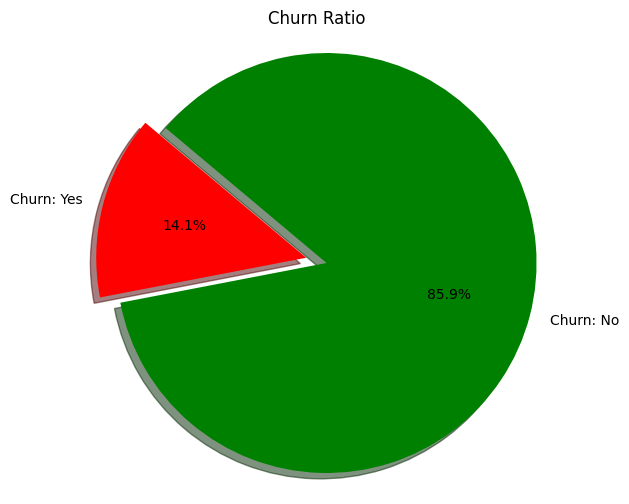

In [5]:
import matplotlib.pyplot as plt

# Calculate churn ratios
churn_counts = data['churn'].value_counts()
yes_ratio = churn_counts[1] / len(data)
no_ratio = churn_counts[0] / len(data)

# Create a pie chart
labels = ['Churn: Yes', 'Churn: No']
sizes = [yes_ratio, no_ratio]
colors = ['red', 'green']
explode = (0.1, 0)  # Explode the 'Churn: Yes' slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.title('Churn Ratio')
plt.show()


In [5]:
##viewing the first 5 top rows to look the glimpse on data
data.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [6]:
##viewing the bottom 5 top rows to look the glimpse on data
data.tail()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no
4999,5000,VT,area_code_415,86,yes,34,no,9.3,16,2.51,...,102,22,267.1,104,22.70,154.8,100,6.97,0,no


# EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [8]:
data.describe()

,Unnamed: 0,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,1443.520003,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,2500.500000,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,3750.250000,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,5000.000000,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [9]:
data.shape

(5000, 21)

In [10]:
data.columns

Index(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge',
       'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn'],
      dtype='object')

In [11]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [12]:
data.duplicated().value_counts()

False    5000
dtype: int64

In [13]:
## dropping unwanted columns
data.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
data['area.code'].value_counts()

area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: area.code, dtype: int64

In [15]:
# here we have to change the data types object to float
data['day.charge'] = data['day.charge'].astype(float)
data['eve.mins'] = data['eve.mins'].astype(float)

In [16]:
##checking if any columns has missing values
data.isnull().sum()

state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

<AxesSubplot: >

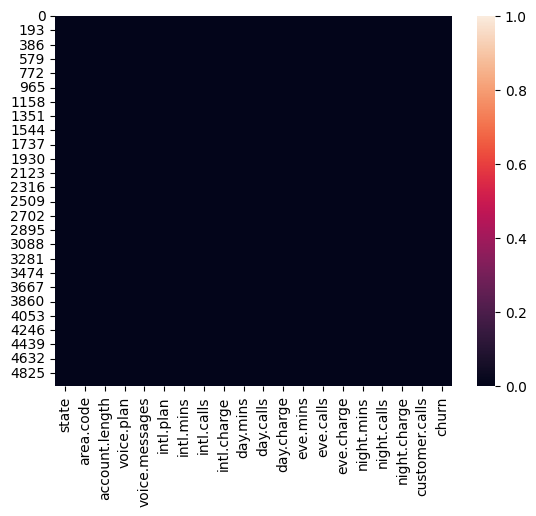

In [17]:
sns.heatmap(data.isnull())

In [18]:
data['day.charge']=data['day.charge'].fillna(data['day.charge'].mean())
data['eve.mins']=data['eve.mins'].fillna(data['eve.mins'].mean())

In [19]:
data.dtypes

state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge        float64
eve.mins          float64
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [20]:
data['state'].value_counts()

WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
NJ    112
UT    112
WI    106
MI    103
ME    103
MA    103
MD    102
VT    101
MT     99
RI     99
KY     99
MS     99
CT     99
KS     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
NC     91
SC     91
FL     90
NV     90
OK     90
TN     89
AZ     89
DC     88
IL     88
NE     88
ND     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: state, dtype: int64

In [21]:
data['area.code'].value_counts()

area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: area.code, dtype: int64

In [22]:
#label Encoding
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'churn'
data['churn']= label_encoder.fit_transform(data['churn'])

In [23]:
# labeling the remaining columns
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
ohe_v = pd.DataFrame(ohe.fit_transform(data[['voice.plan']]),columns=['voice.plan1','voice.plan2'])
ohe_intl = pd.DataFrame(ohe.fit_transform(data[['intl.plan']]),columns=['intl.plan1','intl.plan2'])
ohe_area = pd.DataFrame(ohe.fit_transform(data[['area.code']]),columns=['area_code_415','area_code_408','area_code_510'])

In [24]:
ohe_v

,voice.plan1,voice.plan2
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
4995,0.0,1.0
4996,1.0,0.0
4997,1.0,0.0
4998,1.0,0.0


In [25]:
ohe_area

,area_code_415,area_code_408,area_code_510
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4995,1.0,0.0,0.0
4996,0.0,1.0,0.0
4997,0.0,1.0,0.0
4998,0.0,0.0,1.0


In [26]:
data_1=pd.concat((data,ohe_v,ohe_intl,ohe_area),axis=1,join='inner').drop(['voice.plan','intl.plan','area.code'],axis=1)
data_1

,state,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,...,night.charge,customer.calls,churn,voice.plan1,voice.plan2,intl.plan1,intl.plan2,area_code_415,area_code_408,area_code_510
0,KS,128,25,10.0,3,2.70,265.1,110,45.07,197.4,...,11.01,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,OH,107,26,13.7,3,3.70,161.6,123,27.47,195.5,...,11.45,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,NJ,137,0,12.2,5,3.29,243.4,114,41.38,121.2,...,7.32,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,OH,84,0,6.6,7,1.78,299.4,71,50.90,61.9,...,8.86,2,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,OK,75,0,10.1,3,2.73,166.7,113,28.34,148.3,...,8.41,3,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,40,9.9,5,2.67,235.7,127,40.07,223.0,...,13.39,2,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4996,WV,152,0,14.7,2,3.97,184.2,90,31.31,256.8,...,9.61,3,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4997,DC,61,0,13.6,4,3.67,140.6,89,23.90,172.8,...,9.56,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4998,DC,109,0,8.5,6,2.30,188.8,67,32.10,171.7,...,10.10,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [27]:
data_1.drop('state',axis=1,inplace=True)

In [28]:
data_1

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,...,night.charge,customer.calls,churn,voice.plan1,voice.plan2,intl.plan1,intl.plan2,area_code_415,area_code_408,area_code_510
0,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,...,11.01,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,...,11.45,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,...,7.32,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,...,8.86,2,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,...,8.41,3,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,...,13.39,2,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4996,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,...,9.61,3,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4997,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,...,9.56,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4998,109,0,8.5,6,2.30,188.8,67,32.10,171.7,92,...,10.10,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [29]:
data['churn'].value_counts()

0    4293
1     707
Name: churn, dtype: int64

In [30]:
data_1.isnull().sum()

account.length    0
voice.messages    0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
voice.plan1       0
voice.plan2       0
intl.plan1        0
intl.plan2        0
area_code_415     0
area_code_408     0
area_code_510     0
dtype: int64

# Visualization

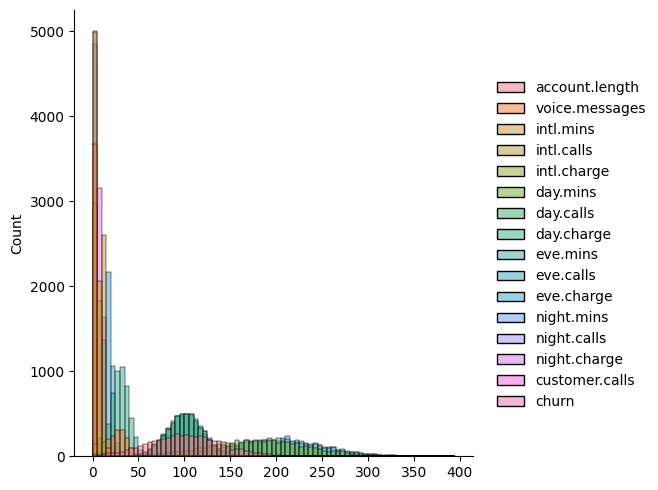

In [31]:
sns.displot(data=data)

array([[<AxesSubplot: title={'center': 'account.length'}>,
        <AxesSubplot: title={'center': 'voice.messages'}>,
        <AxesSubplot: title={'center': 'intl.mins'}>,
        <AxesSubplot: title={'center': 'intl.calls'}>],
       [<AxesSubplot: title={'center': 'intl.charge'}>,
        <AxesSubplot: title={'center': 'day.mins'}>,
        <AxesSubplot: title={'center': 'day.calls'}>,
        <AxesSubplot: title={'center': 'day.charge'}>],
       [<AxesSubplot: title={'center': 'eve.mins'}>,
        <AxesSubplot: title={'center': 'eve.calls'}>,
        <AxesSubplot: title={'center': 'eve.charge'}>,
        <AxesSubplot: title={'center': 'night.mins'}>],
       [<AxesSubplot: title={'center': 'night.calls'}>,
        <AxesSubplot: title={'center': 'night.charge'}>,
        <AxesSubplot: title={'center': 'customer.calls'}>,
        <AxesSubplot: title={'center': 'churn'}>]], dtype=object)

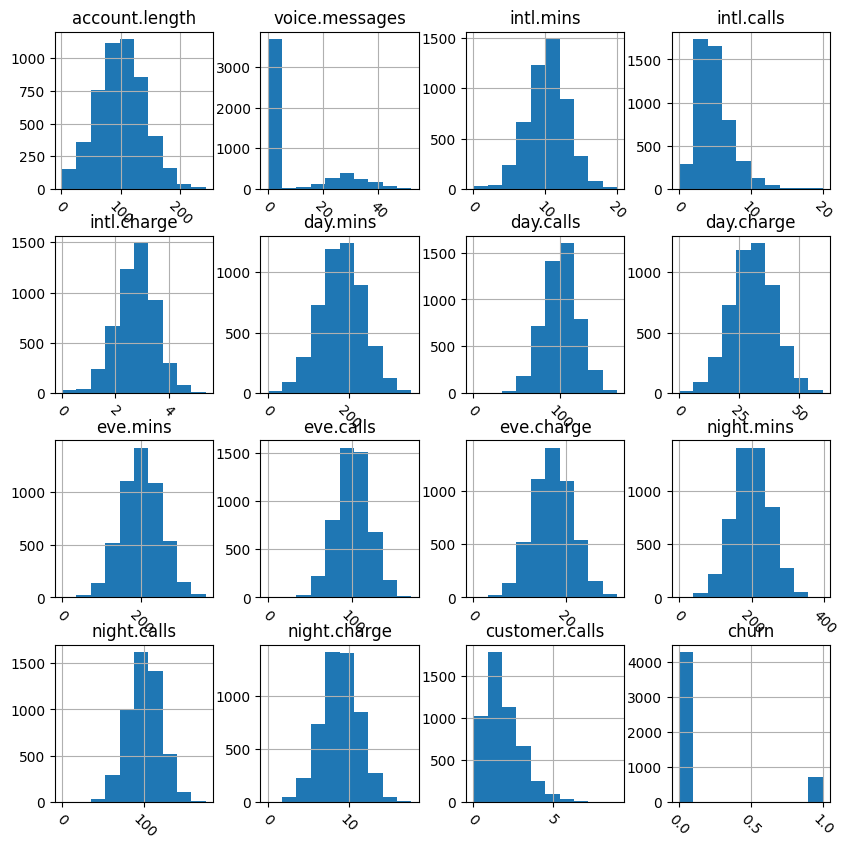

In [32]:
data.hist(figsize=(10,10),xrot=-45)

# Vizualization for churn column

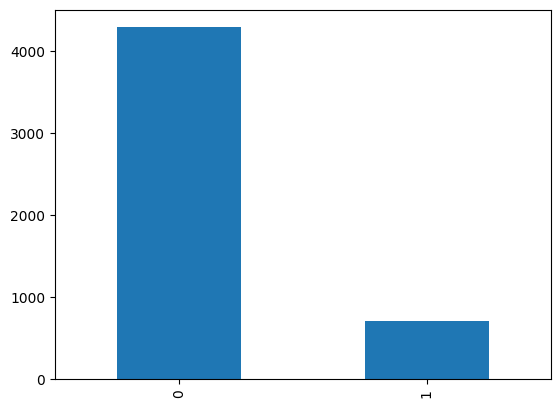

In [33]:
#barplot
value_counts = ['No','Yes']
data['churn'].value_counts().plot.bar()
plt.show()

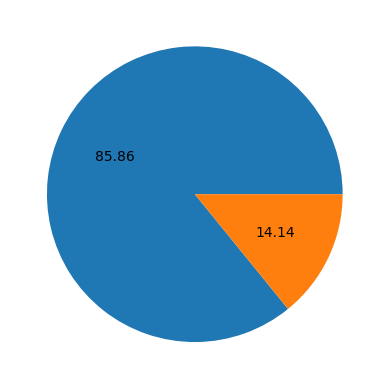

In [34]:
#imbalance Dataset
plt.pie(data['churn'].value_counts(),autopct='%.2f')
plt.show()

In [35]:
# Analyzing state column
data['state'].nunique()

51

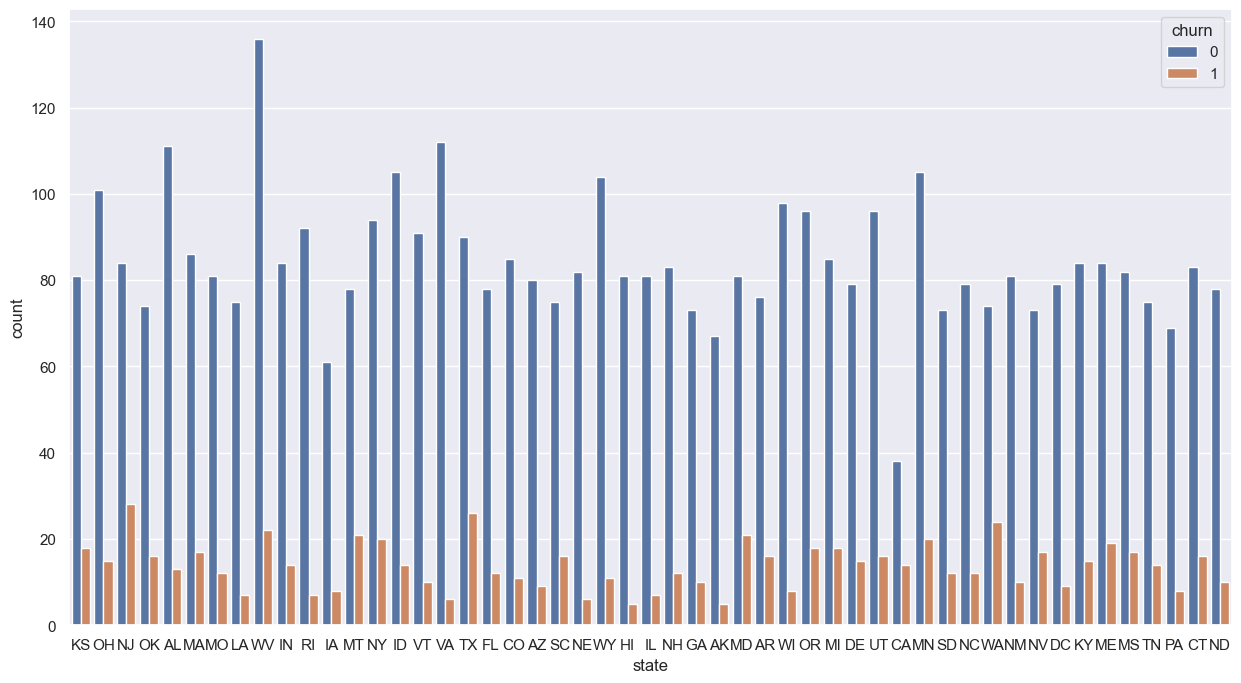

In [36]:
#comparing state & churn column using countplot
sns.set(style = "darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x = 'state', hue='churn',data=data)
plt.show()

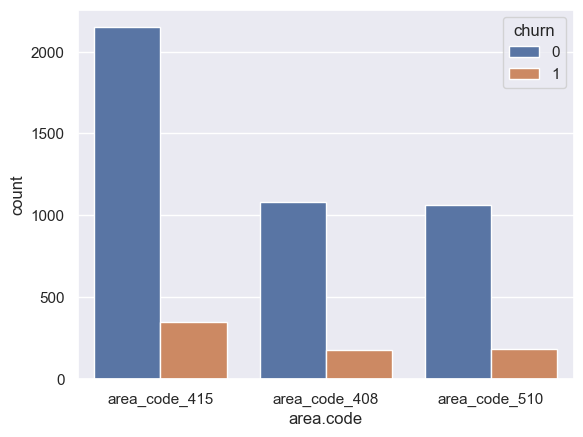

In [37]:
#comparing area code & churn column using countplot
sns.set(style = "darkgrid")
ax = sns.countplot(x ='area.code', hue="churn",data=data)
plt.show()

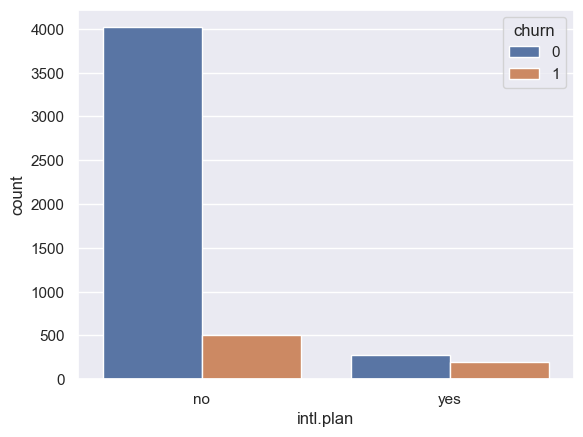

In [38]:
# analysis on international plan
sns.set(style = "darkgrid")
ax = sns.countplot(x ='intl.plan', hue="churn",data=data)
plt.show()

In [39]:
data['intl.plan'].value_counts()

no     4527
yes     473
Name: intl.plan, dtype: int64

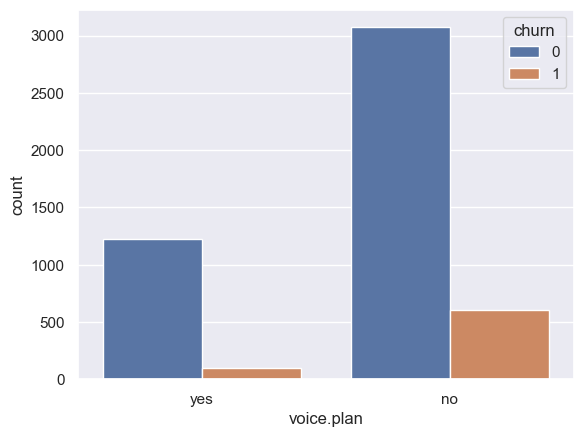

In [40]:
# analysis on voice plan column
sns.set(style = "darkgrid")
ax = sns.countplot(x ='voice.plan', hue="churn",data=data)
plt.show()

In [41]:
data['voice.plan'].value_counts()

no     3677
yes    1323
Name: voice.plan, dtype: int64

In [42]:
#As we can see there is are no clear relation between voice mail plan and churn so we can't clearly say anything so let's move to the next voice mail feature i.e number of voice mail, let's see what it gives to us.

<AxesSubplot: xlabel='customer.calls', ylabel='count'>

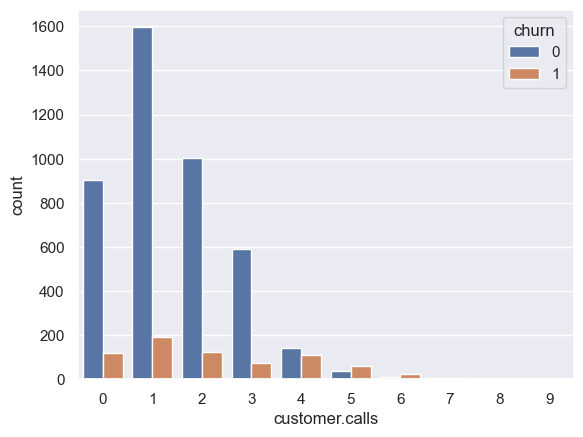

In [43]:
#Analysing using countplot
sns.countplot(x='customer.calls',hue="churn",data = data)

In [44]:
#The above data shows that customer car services are not good at attending the queries of the customer, & also customer who had called more than 5 times . Hence they need to improve their services

<AxesSubplot: >

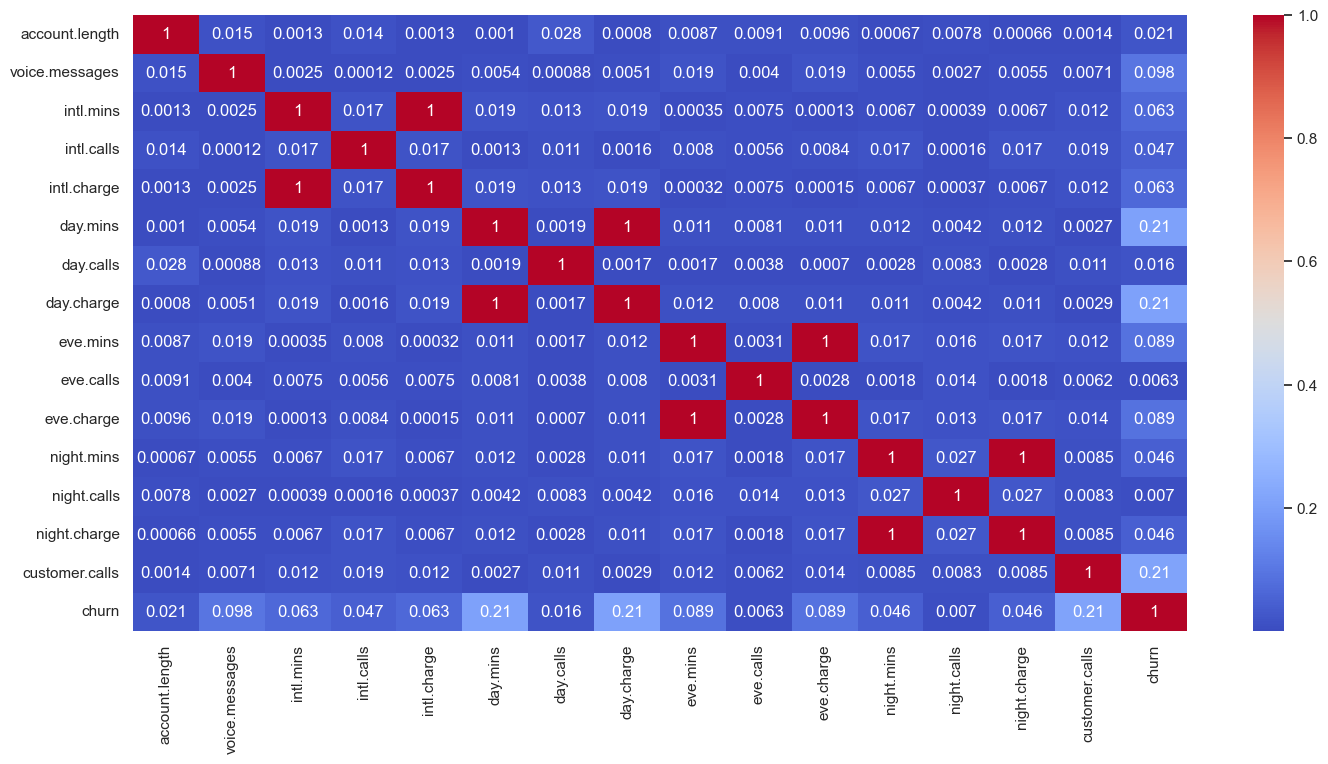

In [45]:
# plotting the corelation matrix

plt.figure(figsize=(17,8))
correlation=data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# To detect the outliers by using Boxplot

<AxesSubplot: >

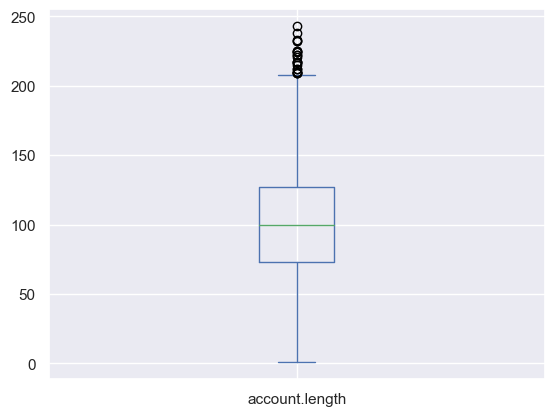

In [46]:
data_1["account.length"].plot(kind="box")

<AxesSubplot: >

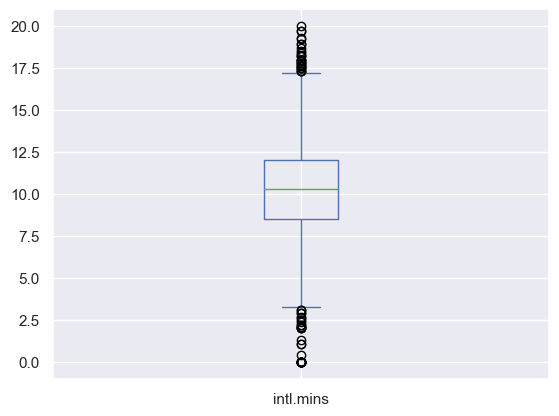

In [47]:
data_1["intl.mins"].plot(kind="box")

<AxesSubplot: >

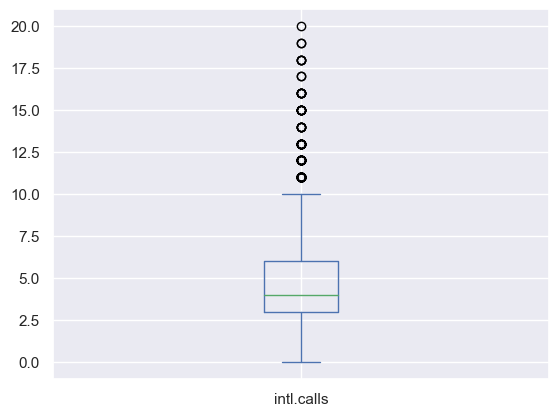

In [48]:
data_1["intl.calls"].plot(kind="box")

# Finding the IQR

In [49]:
percentile25 = data_1['intl.mins'].quantile(0.25)
percentile75 = data_1['intl.mins'].quantile(0.75)

In [50]:
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  12.0
25th quartile:  8.5


In [51]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  3.5


# Finding upper and lower limit

In [52]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Finding Outliers

In [53]:
data_1[data_1['intl.mins'] > upper_limit]
data_1[data_1['intl.mins'] < lower_limit]

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,...,night.charge,customer.calls,churn,voice.plan1,voice.plan2,intl.plan1,intl.plan2,area_code_415,area_code_408,area_code_510
179,70,0,0.0,0,0.00,232.1,122,39.46,292.300000,112,...,9.05,3,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
225,65,0,2.7,4,0.73,213.4,111,36.28,234.500000,94,...,11.25,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
343,98,21,0.0,0,0.00,64.6,98,10.98,176.100000,86,...,11.02,2,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
397,94,0,2.0,2,0.54,234.4,103,39.85,279.300000,109,...,10.54,1,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0
488,165,0,0.0,0,0.00,242.9,126,41.29,209.800000,65,...,10.28,1,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
595,87,28,0.0,0,0.00,151.4,95,25.74,152.400000,97,...,11.25,1,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
712,106,0,0.0,0,0.00,114.4,104,19.45,78.300000,101,...,10.47,2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
762,161,0,1.3,6,0.35,189.6,78,32.23,267.400000,117,...,8.30,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
878,62,0,0.0,0,0.00,281.0,66,47.77,160.600000,108,...,3.51,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1028,70,0,0.0,0,0.00,222.8,114,37.88,215.900000,113,...,10.06,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [54]:
data.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0


# Trimming

In [55]:
new_data = data_1[data_1['intl.mins'] < upper_limit]
new_data.shape

(4971, 23)

# Compare the plots after trimming

# Capping

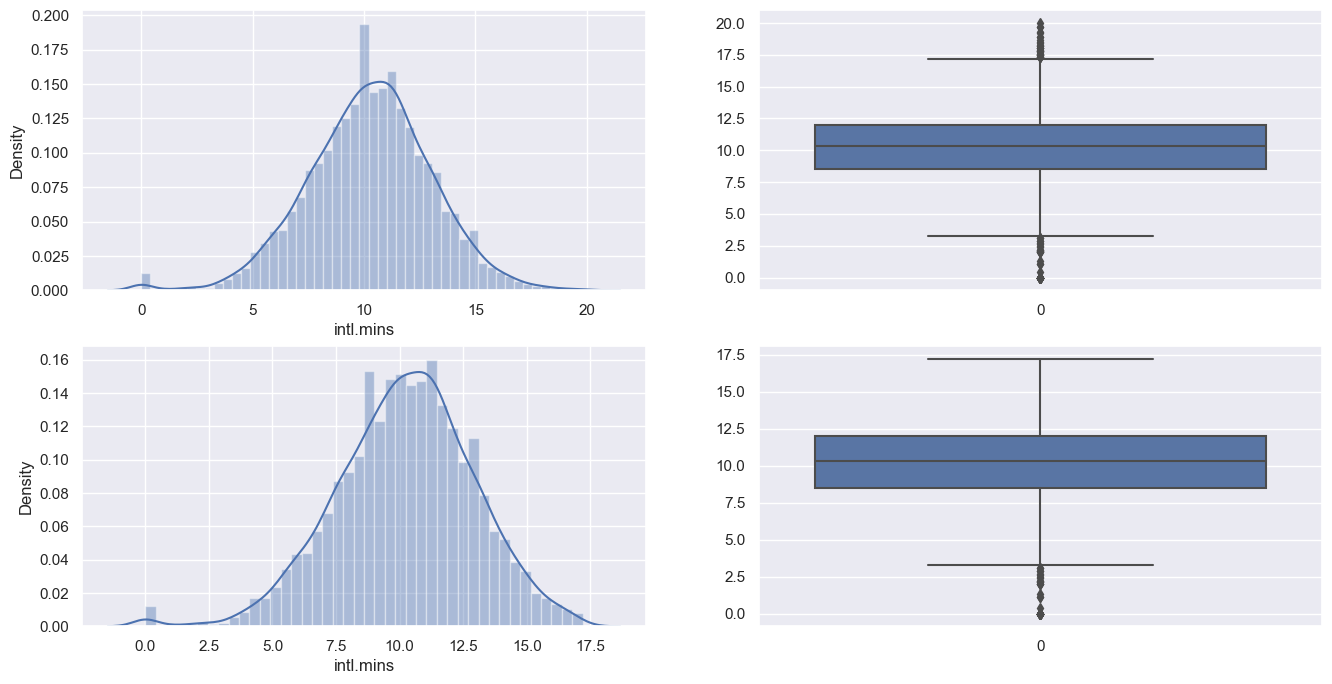

In [56]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_1['intl.mins'])
plt.subplot(2,2,2)
sns.boxplot(data_1['intl.mins'])
plt.subplot(2,2,3)
sns.distplot(new_data['intl.mins'])
plt.subplot(2,2,4)
sns.boxplot(new_data['intl.mins'])
plt.show()

In [57]:
new_df_cap = data_1.copy()
new_df_cap['intl.mins'] = np.where(
    new_df_cap['intl.mins'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['intl.mins'] < lower_limit,
        lower_limit,
        new_df_cap['intl.mins']
    )
)

# Compare the plots after capping

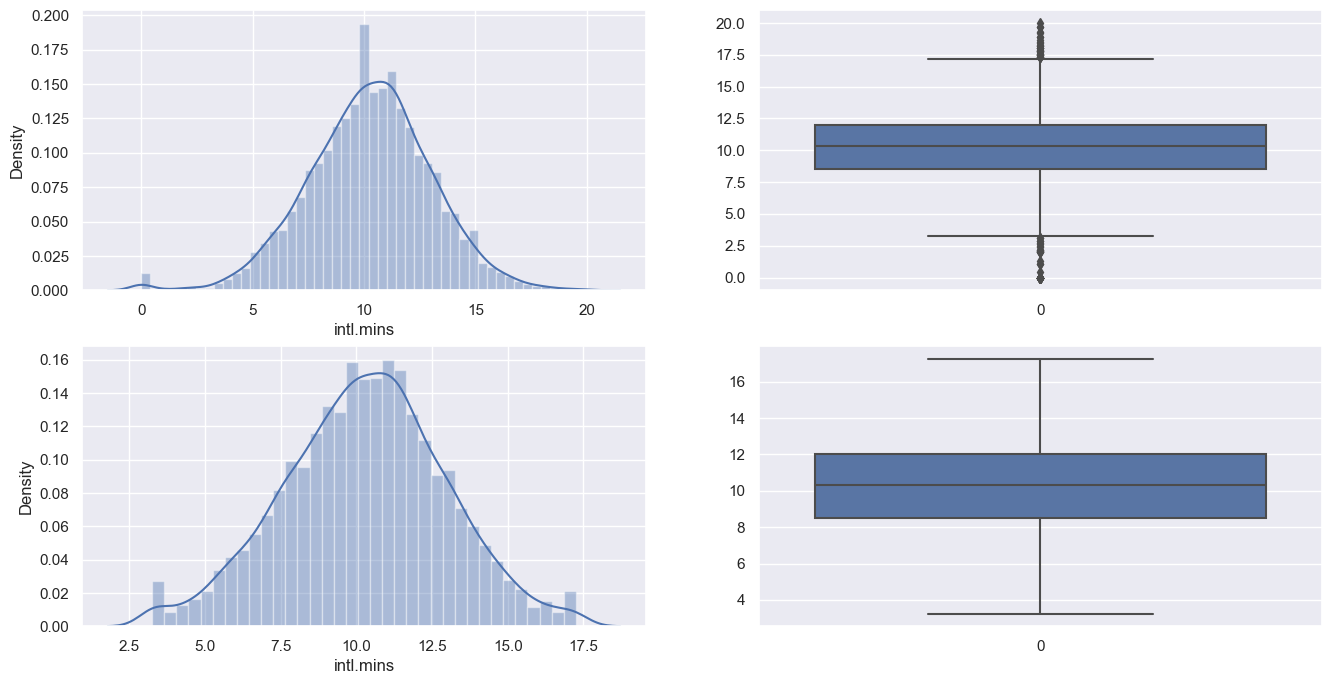

In [58]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_1['intl.mins'])
plt.subplot(2,2,2)
sns.boxplot(data_1['intl.mins'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['intl.mins'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['intl.mins'])
plt.show()

# Feature Engineering

# VIF

In [58]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [60]:
label_encoder = LabelEncoder()
data['state_encoded'] = label_encoder.fit_transform(data['state'])
data['area_code_encoded'] = label_encoder.fit_transform(data['area.code'])
data['voice_plan_encoded'] = label_encoder.fit_transform(data['voice.plan'])
data['intl_plan_encoded'] = label_encoder.fit_transform(data['intl.plan'])

# Select continuous numerical features for VIF calculation
continuous_cols = ['account.length', 'voice.messages', 'intl.mins', 'churn']

# Standardize the continuous features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[continuous_cols])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = continuous_cols
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)

          feature       VIF
0  account.length  1.000608
1  voice.messages  1.009860
2       intl.mins  1.004097
3           churn  1.014153


In [61]:
#!pip install pandas-profiling==3.1.0

In [62]:
#!pip install sweetviz

# Split the data into independent feature and dependent target

In [63]:
X = new_df_cap.drop('churn',axis=1)

y=new_df_cap[['churn']]

In [64]:
new_df_cap

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,...,night.charge,customer.calls,churn,voice.plan1,voice.plan2,intl.plan1,intl.plan2,area_code_415,area_code_408,area_code_510
0,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,...,11.01,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,...,11.45,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,...,7.32,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,...,8.86,2,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,...,8.41,3,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,...,13.39,2,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4996,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,...,9.61,3,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4997,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,...,9.56,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4998,109,0,8.5,6,2.30,188.8,67,32.10,171.7,92,...,10.10,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [65]:
# split the data into train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=104)

In [66]:
new_df_cap.churn.value_counts()

0    4293
1     707
Name: churn, dtype: int64

In [67]:
#!pip install imblearn

# Checking the data was balanced or not¶

In [68]:
new_df_cap["churn"].value_counts()

0    4293
1     707
Name: churn, dtype: int64

In [69]:
measurity=new_df_cap[new_df_cap["churn"]==1]
minority=new_df_cap[new_df_cap["churn"]==0]

In [70]:
print(measurity.shape,minority.shape)# here is data not balanced

(707, 23) (4293, 23)


# Here we have to handle imbalanced data by using over sampling


# Random OverSampler

In [71]:
from imblearn.over_sampling import RandomOverSampler
res=RandomOverSampler(random_state=0)
x_res,y_res=res.fit_resample(x_train,y_train)

# now our data is balanced

In [72]:
x_res.shape,y_res.shape

((6868, 22), (6868, 1))

In [73]:
# building model
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_res, y_res)

LogisticRegression(random_state=0)

In [74]:
y_test_pred=classifier.predict(x_test)

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [76]:
#print classification report for model
print(classification_report(y_test, y_test_pred))
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)
cf_matrix=confusion_matrix(y_test_pred,y_test)
cf_matrix

              precision    recall  f1-score   support

           0       0.94      0.71      0.81       859
           1       0.30      0.74      0.43       141

    accuracy                           0.72      1000
   macro avg       0.62      0.73      0.62      1000
weighted avg       0.85      0.72      0.76      1000

accuracy_score :  0.717
precision_score :  0.29829545454545453
recall_score :  0.7446808510638298
f1_score :  0.42596348884381335


array([[612,  36],
       [247, 105]], dtype=int64)

# SMOTE

In [77]:
# here we are using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

In [78]:
x_train_res.shape,y_train_res.shape

((6868, 22), (6868, 1))

In [79]:
# building model
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train_res, y_train_res)
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)
cf_matrix=confusion_matrix(y_test_pred,y_test)
cf_matrix

accuracy_score :  0.717
precision_score :  0.29829545454545453
recall_score :  0.7446808510638298
f1_score :  0.42596348884381335


array([[612,  36],
       [247, 105]], dtype=int64)

In [80]:
y_test_pred=classifier.predict(x_test)

In [81]:
from sklearn.metrics import classification_report

#print classification report for model
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       859
           1       0.30      0.75      0.42       141

    accuracy                           0.71      1000
   macro avg       0.62      0.73      0.62      1000
weighted avg       0.85      0.71      0.75      1000



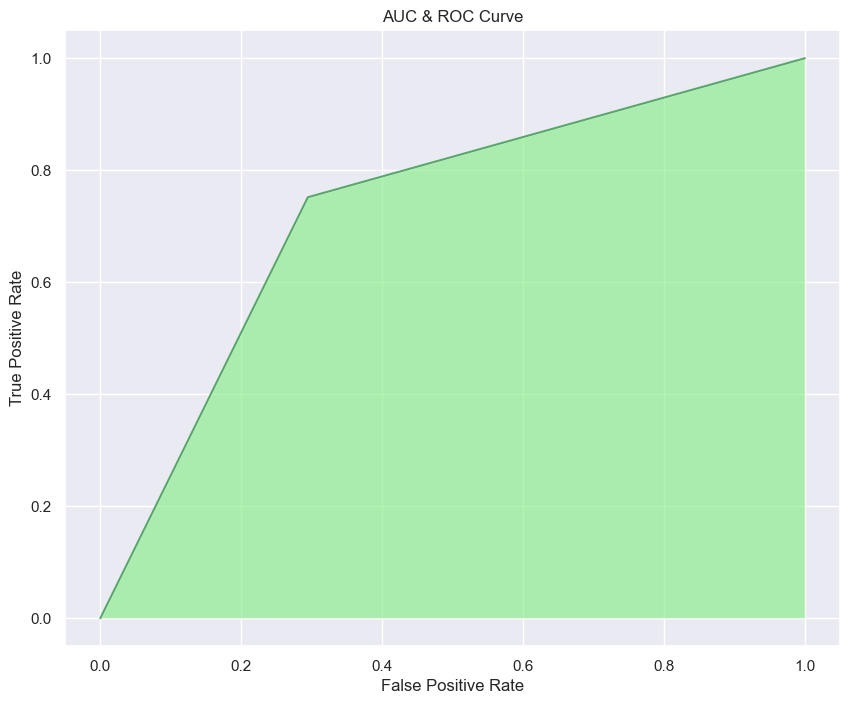

In [82]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_test_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_test_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(x_train, y_train)
y_test_pred = rf_classifier.predict(x_test)

In [85]:
# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_test_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       859
           1       0.91      0.75      0.82       141

    accuracy                           0.95      1000
   macro avg       0.93      0.87      0.90      1000
weighted avg       0.95      0.95      0.95      1000



In [86]:
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.954


In [87]:
feature_importances = rf_classifier.feature_importances_
# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': x_train.columns, 'importance': feature_importances})
# Sort by importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Print the features
print("Top 16 Feature Importances:")
print(feature_importances_df)

Top 16 Feature Importances:
           feature  importance
5         day.mins    0.160321
7       day.charge    0.131880
14  customer.calls    0.115282
8         eve.mins    0.061564
10      eve.charge    0.058195
3       intl.calls    0.051792
2        intl.mins    0.051455
4      intl.charge    0.043458
18      intl.plan2    0.040355
11      night.mins    0.039754
13    night.charge    0.037821
17      intl.plan1    0.037710
0   account.length    0.029469
6        day.calls    0.028502
12     night.calls    0.027186
9        eve.calls    0.025942
1   voice.messages    0.020065
15     voice.plan1    0.014052
16     voice.plan2    0.012990
20   area_code_408    0.004654
21   area_code_510    0.003906
19   area_code_415    0.003649


In [88]:
# Specify the threshold for feature importance below which you want to drop features
threshold = 0.025

# Get the list of features to drop
features_to_drop = feature_importances_df[feature_importances_df['importance'] < threshold]['feature']

# Drop the least important features from the dataset
x_train_filtered = x_train.drop(features_to_drop, axis=1)
x_test_filtered = x_test.drop(features_to_drop, axis=1)

# Print the list of dropped features
print("Dropped Features:")
print(features_to_drop)

Dropped Features:
1     voice.messages
15       voice.plan1
16       voice.plan2
20     area_code_408
21     area_code_510
19     area_code_415
Name: feature, dtype: object


In [89]:
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("precision_score:", precision)
print("recall_score:", recall)
print("f1_score:", f1)


precision_score: 0.905982905982906
recall_score: 0.75177304964539
f1_score: 0.8217054263565892


In [90]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test_pred,y_test)
cf_matrix

array([[848,  35],
       [ 11, 106]], dtype=int64)

In [91]:
# Get the number of unique column names in x_train_filtered
num_unique_columns = x_test_filtered.columns.nunique()
num_unique_columns1 = x_train_filtered.columns.nunique()
# Print the number of unique columns
print("Number of test unique columns:", num_unique_columns)
print("Number of train unique columns:", num_unique_columns1)

Number of test unique columns: 16
Number of train unique columns: 16


# Modeling

# logistic regression

In [94]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train_filtered, y_train)

# Predictions
y_pred = logreg.predict(x_test_filtered)


In [95]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
train_accuracy_logreg = accuracy_score(y_train, logreg.predict(x_train_filtered))
test_accuracy_logreg = accuracy_score(y_test, logreg.predict(x_test_filtered))

# Print metrics
print("Logistic Regression Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(f"Training Accuracy: {train_accuracy_logreg:.2f}")
print(f"Testing Accuracy: {test_accuracy_logreg:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Logistic Regression Performance:
Accuracy: 0.866
Precision: 0.5660377358490566
Recall: 0.2127659574468085
F1-score: 0.30927835051546393
Training Accuracy: 0.86
Testing Accuracy: 0.87
Confusion Matrix:
 [[836  23]
 [111  30]]


# Gradient Boosting Classifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=47)
gb_classifier.fit(x_train_filtered, y_train)

# Predictions
y_pred = gb_classifier.predict(x_test_filtered)


In [97]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
train_accuracy_gb_classifier = accuracy_score(y_train, gb_classifier.predict(x_train_filtered))
test_accuracy_gb_classifier = accuracy_score(y_test, gb_classifier.predict(x_test_filtered))

# Print metrics
print("Gardient Boosting Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(f"Training Accuracy: {train_accuracy_gb_classifier:.2f}")
print(f"Testing Accuracy: {test_accuracy_gb_classifier:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Gardient Boosting Performance:
Accuracy: 0.937
Precision: 0.8421052631578947
Recall: 0.6808510638297872
F1-score: 0.7529411764705882
Training Accuracy: 0.96
Testing Accuracy: 0.94
Confusion Matrix:
 [[841  18]
 [ 45  96]]


# KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train_filtered, y_train)

# Predictions
y_pred = knn_classifier.predict(x_test_filtered)


In [99]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
train_accuracy_knn_classifier = accuracy_score(y_train, knn_classifier.predict(x_train_filtered))
test_accuracy_knn_classifier = accuracy_score(y_test, knn_classifier.predict(x_test_filtered))

# Print metrics
print("KNN Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(f"Training Accuracy: {train_accuracy_knn_classifier:.2f}")
print(f"Testing Accuracy: {test_accuracy_knn_classifier:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

KNN Performance:
Accuracy: 0.877
Precision: 0.6363636363636364
Recall: 0.2978723404255319
F1-score: 0.40579710144927533
Training Accuracy: 0.90
Testing Accuracy: 0.88
Confusion Matrix:
 [[835  24]
 [ 99  42]]


# Using Decision Tree Classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5)
dt_classifier.fit(x_train_filtered, y_train)
dt_classifier.tree_.node_count
dt_classifier.tree_.max_depth
y_pred = dt_classifier.predict(x_test_filtered)

In [101]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
train_accuracy_dt_classifier = accuracy_score(y_train, dt_classifier.predict(x_train_filtered))
test_accuracy_dt_classifier = accuracy_score(y_test, dt_classifier.predict(x_test_filtered))

# Print metrics
print("Decision Tree Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(f"Training Accuracy: {train_accuracy_dt_classifier:.2f}")
print(f"Testing Accuracy: {test_accuracy_dt_classifier:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Decision Tree Performance:
Accuracy: 0.925
Precision: 0.7704918032786885
Recall: 0.6666666666666666
F1-score: 0.7148288973384029
Training Accuracy: 0.94
Testing Accuracy: 0.93
Confusion Matrix:
 [[831  28]
 [ 47  94]]


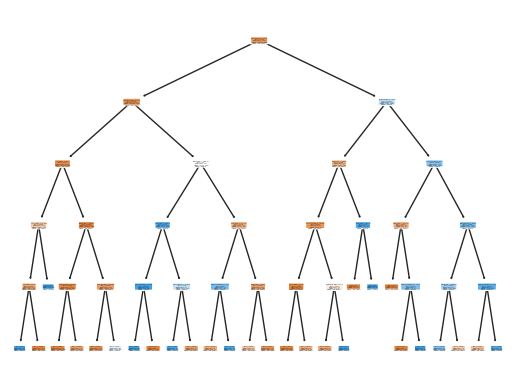

In [102]:
from sklearn import tree
tree.plot_tree(dt_classifier, feature_names=x_train_filtered.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True)
plt.show()

### Using CatBoost Model

In [103]:
from catboost import CatBoostClassifier


In [122]:
cb_classifier = CatBoostClassifier(verbose=0).fit(x_train_filtered,y_train)


In [123]:
y_pred= cb_classifier.predict(x_test_filtered)

In [125]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
train_accuracy_cb_classifier = accuracy_score(y_train, cb_classifier.predict(x_train_filtered))
test_accuracy_cb_classifier = accuracy_score(y_test, cb_classifier.predict(x_test_filtered))

# Print metrics
print("CatBoost Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(f"Training Accuracy: {train_accuracy_cb_classifier:.2f}")
print(f"Testing Accuracy: {test_accuracy_cb_classifier:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

CatBoost Performance:
Accuracy: 0.944
Precision: 0.84
Recall: 0.7446808510638298
F1-score: 0.7894736842105262
Training Accuracy: 0.98
Testing Accuracy: 0.94
Confusion Matrix:
 [[839  20]
 [ 36 105]]


# As we can see CatBoost Classifier gives us the best results amongst the classification models we tried.
## Hence we'll hypertune and see if we can get some amount of changes in CatBoost Classifier

# Hyperparameter Tuning

In [113]:
from sklearn.model_selection import GridSearchCV
# catboost hyperparameter tuning
cb_param_grid = {
    'iterations': [200, 250, 300],
    'learning_rate': [0.5,0.6,0.7,0.8],
    'max_depth': [3, 4, 5,6]
}

cb_clf = CatBoostClassifier(verbose=0)
cb_grid_search = GridSearchCV(cb_clf, param_grid=cb_param_grid, scoring='accuracy', cv=5)
cb_grid_search.fit(x_train_filtered, y_train)


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002224438BA50>,
             param_grid={'iterations': [200, 250, 300],
                         'learning_rate': [0.5, 0.6, 0.7, 0.8],
                         'max_depth': [3, 4, 5, 6]},
             scoring='accuracy')

In [114]:
# catboost
best_cb_params = cb_grid_search.best_params_
best_cb_score = cb_grid_search.best_score_


print("Best catBoost Parameters:", best_cb_params)
print("Best CatBoost Score:", best_cb_score)


Best catBoost Parameters: {'iterations': 250, 'learning_rate': 0.5, 'max_depth': 4}
Best CatBoost Score: 0.9335000000000001


## As we can see Hyperparameter tuning doesn't gives us better results than the original data trained so we'll move forward with original catboost model

## Using Joblib we are going to export models and proceed with deployment

In [ ]:
import joblib
joblib.dump(cb_classifier, 'catboost.pkl')

##### We have made the packaged file here and completed the deployment from this file